In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Mounted at /content/drive


In [2]:
df=pd.read_csv("/content/drive/MyDrive/DS4All - Cohort6 - Team 172/Code/eda-tables/Dataset/audio_metadata_lluvias_with_environmental.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (22,46) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
dfLab=pd.read_csv("/content/drive/MyDrive/DS4All - Cohort6 - Team 172/Code/eda-tables/Dataset/audio_labels.csv")

In [4]:
labels={"SENSAT":"Saturated","MURCIE":"Bat","INSECT":"Insect","LLUVIA":"Rain","PULSOS":"Pulse",
        "HERPET":"Herpetus","ANTROP":"anthrophony","AVEVOC":"Birds","TRAMOT":"Motor",
        "INDETE":"Indeterminate","PASOS":"Steps","FLUAGU":"Water Flow","ANIDOM":"domesticated animals"}
gLabels={"SENSAT":"Other","MURCIE":"biophony","INSECT":"biophony","LLUVIA":"geophony","PULSOS":"Other",
        "HERPET":"biophony","ANTROP":"anthrophony","AVEVOC":"biophony","TRAMOT":"anthrophony",
        "INDETE":"Other","PASOS":"Other","FLUAGU":"geophony","ANIDOM":"anthrophony"}

In [5]:
dfLab["label_desc"]=dfLab["label"].replace(labels)
dfLab["grand_label"]=dfLab["label"].replace(gLabels)

In [6]:
delcols=["Unnamed: 0","site","path_audio","parentEven","Habitat","Dis_CP","Dis_Oleodu","Dis_Pozo","Dis_Pozact","Dis_Ferroc","Dis_Kale","Dis_Plater","DisBosque","Dis_CobNat",
         "Dis_Cienag","Dis_MGSG","Dis_Dre345","UCSuelo","CobertXHabitat aves","CobertXHabitat Herpetos","CobertXHabitat Escarabajos","Tam_Parche","Dis_PlatEf","Plataf",
         "Orden","Dis_ViaPri","Dia_ViaSec","Red Hidrica","Tipo Cuerpo Agua","Nombre","FInt19meanx","HEH18meanx","Unnamed: 37"]

df=df[list(set(df.columns)-set(delcols))]

In [7]:
df.head()

,length,Latitud/Longitud (grados decimales),Presión sonora 2,samples,decimalLat,decimalLon,time,channels,GrupoBiolo,Presión sonora 3,...,recorder_model,sensor_name,bits,eventID,verbatimLo,Tipo,Presión sonora 1,Presión sonora 4,verbatimLa,Cobertura
0,60,"7.3723004,-73.8630135",45.8,11520000,7.372222,-73.862972,140000,1,Sensores Pasivos,40.1,...,Audiomoth,G001,16,ANH_64,"73°51' 46,700"" W",PE,54.8,39.8,"7°22' 20,000"" N",Palma
1,60,"7.3723004,-73.8630135",45.8,11520000,7.372222,-73.862972,143000,1,Sensores Pasivos,40.1,...,Audiomoth,G001,16,ANH_64,"73°51' 46,700"" W",PE,54.8,39.8,"7°22' 20,000"" N",Palma
2,60,"7.3723004,-73.8630135",45.8,11520000,7.372222,-73.862972,150000,1,Sensores Pasivos,40.1,...,Audiomoth,G001,16,ANH_64,"73°51' 46,700"" W",PE,54.8,39.8,"7°22' 20,000"" N",Palma
3,60,"7.3723004,-73.8630135",45.8,11520000,7.372222,-73.862972,153000,1,Sensores Pasivos,40.1,...,Audiomoth,G001,16,ANH_64,"73°51' 46,700"" W",PE,54.8,39.8,"7°22' 20,000"" N",Palma
4,60,"7.3723004,-73.8630135",45.8,11520000,7.372222,-73.862972,160000,1,Sensores Pasivos,40.1,...,Audiomoth,G001,16,ANH_64,"73°51' 46,700"" W",PE,54.8,39.8,"7°22' 20,000"" N",Palma


In [8]:
df["date"]=pd.to_datetime(df["date"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
df["hour"]=df["date"].dt.hour

In [10]:
df["date2"]=df["date"].dt.strftime('%Y-%m-%d')

In [11]:
df.head().T

,0,1,2,3,4
length,60,60,60,60,60
Latitud/Longitud (grados decimales),"7.3723004,-73.8630135","7.3723004,-73.8630135","7.3723004,-73.8630135","7.3723004,-73.8630135","7.3723004,-73.8630135"
Presión sonora 2,45.8,45.8,45.8,45.8,45.8
samples,11520000,11520000,11520000,11520000,11520000
decimalLat,7.372222,7.372222,7.372222,7.372222,7.372222
decimalLon,-73.862972,-73.862972,-73.862972,-73.862972,-73.862972
time,140000,143000,150000,153000,160000
channels,1,1,1,1,1
GrupoBiolo,Sensores Pasivos,Sensores Pasivos,Sensores Pasivos,Sensores Pasivos,Sensores Pasivos
Presión sonora 3,40.1,40.1,40.1,40.1,40.1


In [12]:
dfLab.head().T

,0,1,2,3,4
fname,G001_20211112_030000.WAV,G001_20211112_180000.WAV,G001_20211112_183000.WAV,G001_20211112_203000.WAV,G001_20211112_220000.WAV
label,SENSAT,MURCIE,INSECT,MURCIE,SENSAT
max_f,47297.562,44956.098,51980.49,33482.926,24585.365
max_t,5.0,5.0,5.0,5.0,5.0
min_f,47297.562,24819.512,3721.417,16776.25,24585.365
min_t,0.0,0.0,0.0,0.0,0.0
sample_idx,0000.wav,0001.wav,0002.wav,0003.wav,0004.wav
label_desc,Saturated,Bat,Insect,Bat,Saturated
grand_label,Other,biophony,biophony,biophony,Other


In [13]:
df.isna().sum()

length                                   0
Latitud/Longitud (grados decimales)      0
Presión sonora 2                         0
samples                                  0
decimalLat                               0
decimalLon                               0
time                                     0
channels                                 0
GrupoBiolo                               0
Presión sonora 3                         0
date                                   959
fname_audio                              0
sample.rate                              0
fsize                                    0
recorder_model                           0
sensor_name                              0
bits                                     0
eventID                                  0
verbatimLo                               0
Tipo                                     0
Presión sonora 1                         0
Presión sonora 4                         0
verbatimLa                               0
Cobertura  

In [14]:
df=df.merge(dfLab,left_on="fname_audio",right_on="fname",how="left")

In [15]:
df.isna().sum()

length                                     0
Latitud/Longitud (grados decimales)        0
Presión sonora 2                           0
samples                                    0
decimalLat                                 0
decimalLon                                 0
time                                       0
channels                                   0
GrupoBiolo                                 0
Presión sonora 3                           0
date                                     959
fname_audio                                0
sample.rate                                0
fsize                                      0
recorder_model                             0
sensor_name                                0
bits                                       0
eventID                                    0
verbatimLo                                 0
Tipo                                       0
Presión sonora 1                           0
Presión sonora 4                           0
verbatimLa

In [16]:
dfInd=pd.read_csv("/content/drive/MyDrive/DS4All - Cohort6 - Team 172/Code/eda-tables/Dataset/allsites_acoustic_indices_env.csv")

In [17]:
delcols=["date","sensor_name","time","Cobertura","proba_rain"]
dfInd=dfInd[list(set(dfInd.columns)-set(delcols))]

In [18]:
dfInd

,H,Hf,fname_audio,ADI,SC,BI,Ht,NDSI,NP,ACI
0,0.892344,0.924358,G001_20211109_140000.WAV,3.087798,0.000000,3.001891,0.965367,0.681387,0.0,303.127146
1,0.807247,0.883948,G001_20211109_143000.WAV,3.076320,0.000095,10.285248,0.913229,0.766296,1.0,313.319992
2,0.734403,0.777215,G001_20211109_150000.WAV,3.040486,0.000295,13.308916,0.944916,0.309720,4.0,319.347569
3,0.808704,0.831003,G001_20211109_153000.WAV,3.076533,0.000628,9.306343,0.973166,0.914500,7.0,309.366694
4,0.850281,0.873987,G001_20211109_160000.WAV,3.046628,0.000306,20.313311,0.972876,0.812334,6.0,307.190642
...,...,...,...,...,...,...,...,...,...,...
93881,0.764537,0.788975,G100_20211201_100000.WAV,3.064627,0.000373,14.812060,0.969026,-0.081580,4.0,306.756470
93882,0.649559,0.663890,G100_20211201_103000.WAV,3.049776,0.000003,13.566143,0.978413,-0.448406,2.0,305.172573
93883,0.557475,0.611370,G100_20211201_110000.WAV,3.040166,0.000033,9.541844,0.911846,-0.483263,1.0,304.247705
93884,0.763169,0.781996,G100_20211201_113000.WAV,3.071741,0.000008,5.950824,0.975924,-0.230183,1.0,304.075114


In [19]:
df=df.merge(dfInd,on="fname_audio",how="left")

In [20]:
#Acoustic Index:
#ADI Acoustic Diversity Index
#NP Number of peaks
#SC Spectral Cover
#H Acoustic Entropy Index
#ACI coustic Complexity Index
#BI Biophony index
#NDSI Normalized Difference Soundscape Index

In [21]:
df_Labeled=df[~df["label"].isna()]


In [22]:
df_Labeled.head(1).T

,122
length,60
Latitud/Longitud (grados decimales),"7.3723004,-73.8630135"
Presión sonora 2,45.8
samples,11520000
decimalLat,7.372222
decimalLon,-73.862972
time,30000
channels,1
GrupoBiolo,Sensores Pasivos
Presión sonora 3,40.1


In [23]:
df_Labeled=df_Labeled[list(set(df_Labeled.columns)-set(["verbatimLa","fname","sample_idx","Latitud/Longitud (grados decimales)","Tipo","verbatimLo",""]))]
df=df[list(set(df.columns)-set(["verbatimLa","fname","sample_idx","Latitud/Longitud (grados decimales)","Tipo","verbatimLo",""]))]

In [24]:
df_Labeled.head(1).T

,122
length,60
date2,2021-11-12
max_f,47297.562
Presión sonora 2,45.8
NDSI,0.999129
NP,53.0
samples,11520000
decimalLat,7.372222
decimalLon,-73.862972
min_t,0.0


In [25]:
len(df_Labeled.columns)

38

In [26]:
df_Labeled.columns

Index(['length', 'date2', 'max_f', 'Presión sonora 2', 'NDSI', 'NP', 'samples',
       'decimalLat', 'decimalLon', 'min_t', 'SC', 'label_desc', 'BI', 'time',
       'channels', 'GrupoBiolo', 'label', 'H', 'Presión sonora 3', 'date',
       'fname_audio', 'max_t', 'grand_label', 'sample.rate', 'fsize',
       'recorder_model', 'sensor_name', 'Ht', 'min_f', 'ACI', 'bits', 'Hf',
       'eventID', 'Presión sonora 1', 'Presión sonora 4', 'ADI', 'Cobertura',
       'hour'],
      dtype='object')

In [27]:
cols=["fname_audio","eventID",	"sensor_name",	"recorder_model","date","date2","time","hour",
      "decimalLat","decimalLon","grand_label","label",	"label_desc",
      "Cobertura","GrupoBiolo",	"fsize","sample.rate",	"samples",	"channels",	"bits","length",
      "Presión sonora 1","Presión sonora 2",	"Presión sonora 3",	"Presión sonora 4",
      "min_f",	"max_f",	"min_t",	"max_t",
      "BI",	"NP", "ACI",	"NDSI",	"ADI",	"H",	"Ht",	"Hf",	"SC"]

In [28]:
df_Labeled=df_Labeled[cols]
df=df[cols]

In [29]:
len(df_Labeled.columns)

38

In [30]:
df_Labeled.head().to_excel("Sample.xlsx",index=None)

In [31]:
df.shape

(93923, 38)

In [32]:
df_Labeled.shape

(1098, 38)

In [33]:
df_Labeled.to_csv("Labeled Metatabla.csv",index=None)

In [34]:
df.to_csv("Metatabla.csv",index=None)

In [36]:
df_Labeled[]

Index(['fname_audio', 'eventID', 'sensor_name', 'recorder_model', 'date',
       'date2', 'time', 'hour', 'decimalLat', 'decimalLon', 'grand_label',
       'label', 'label_desc', 'Cobertura', 'GrupoBiolo', 'fsize',
       'sample.rate', 'samples', 'channels', 'bits', 'length',
       'Presión sonora 1', 'Presión sonora 2', 'Presión sonora 3',
       'Presión sonora 4', 'min_f', 'max_f', 'min_t', 'max_t', 'BI', 'NP',
       'ACI', 'NDSI', 'ADI', 'H', 'Ht', 'Hf', 'SC'],
      dtype='object')

In [40]:
dfIndex=df_Labeled[["Cobertura","hour",'BI', 'NP',
       'ACI', 'NDSI', 'ADI', 'H', 'Ht', 'Hf', 'SC']].copy()

In [43]:
dfIndex=pd.melt(dfIndex, id_vars=["Cobertura","hour"], 
        value_vars=['BI', 'NP','ACI', 'NDSI', 'ADI', 'H', 'Ht', 'Hf', 'SC'], 
        var_name="Index", value_name='value')

In [44]:
dfIndex.head()

,Cobertura,hour,Index,value
0,Palma,3.0,BI,39.688725
1,Palma,18.0,BI,63.697559
2,Palma,18.0,BI,79.388452
3,Palma,20.0,BI,64.710699
4,Palma,22.0,BI,64.720336


In [46]:
import seaborn as sns

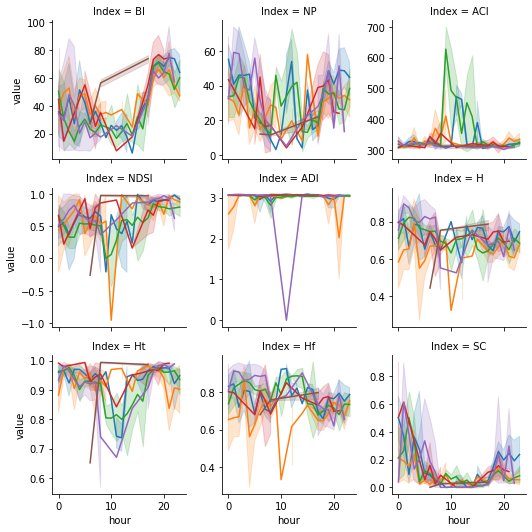

In [53]:
g = sns.FacetGrid(dfIndex, col="Index", height=2.5, col_wrap=3,sharey=False,palette="viridis")
g.map(sns.lineplot, "hour", "value","Cobertura");

In [51]:
df=pd.read_csv("/content/drive/MyDrive/DS4All - Cohort6 - Team 172/Code/eda-tables/Dataset/audio_metadata_lluvias.csv")